In [1]:
import sys
import os

import torch
from torch import nn

project_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_path)

from src.data.preprocess_data import Vocabulary, SpookyAuthors

In [2]:
train_data = SpookyAuthors(root='../data/processed/')
test_data = SpookyAuthors(root='../data/processed/', train=False, max_length=(len(train_data[0][0])), vocab=train_data.vocab)

In [3]:
from torch.utils.data import DataLoader

batch_size = 64

train_loader = DataLoader(train_data, batch_size)
test_loader = DataLoader(test_data, batch_size)

In [4]:
device = torch.device("cuda") if torch	.cuda.is_available() else torch.device("cpu")

In [5]:
from src.models.TextCNN import TextCNN

textcnn = TextCNN(vocab_size=len(train_data.vocab),
                  embedding_dim=50,
                  hidden_dim=64,
                #   kernel_sizes=[(2, 1), (3, 1), (4, 1)],
                  kernel_sizes=[2, 3, 4],
                  output_dim=3,
                  dropout_prob=0.2)
textcnn.to(device)

TextCNN(
  (embedding): Embedding(23167, 50)
  (conv_layer): ModuleList(
    (0): Conv1d(50, 64, kernel_size=(2,), stride=(1,))
    (1): Conv1d(50, 64, kernel_size=(3,), stride=(1,))
    (2): Conv1d(50, 64, kernel_size=(4,), stride=(1,))
  )
  (dropout): Dropout(p=0.2, inplace=False)
  (full_connected): Sequential(
    (0): Linear(in_features=384, out_features=192, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): ReLU()
    (3): Linear(in_features=192, out_features=192, bias=True)
    (4): Dropout(p=0.2, inplace=False)
    (5): ReLU()
    (6): Linear(in_features=192, out_features=192, bias=True)
  )
  (linear): Linear(in_features=192, out_features=3, bias=True)
  (relu): ReLU()
)

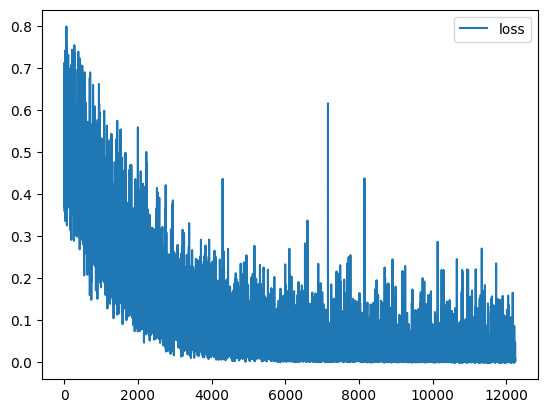

In [8]:
from src.training.train_model import train_model

train_model(model=textcnn,
            dataloader=train_loader,
            epochs=50)

In [9]:
from src.training.evaluate_model import test_model

test_model(textcnn, train_loader, device)

0.0032727659001116328